# Figures 4 and 5

In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open("LightGBM_results_NO_celltype.json", "r") as data:
    lightgbm_results_wo_celltypes = json.load(data)
    for k, v in lightgbm_results_wo_celltypes.items():
        lightgbm_results_wo_celltypes[k] = np.mean(list(v.values()))
    
with open("0v60.json", "r") as data:
    deepST_results_wo_celltypes_by_gene = json.load(data)
    deepST_results_wo_celltypes = {}
    deepST_results_wo_celltypes["0"] = np.mean([deepST_results_wo_celltypes_by_gene["5"][x]["base"] for x in deepST_results_wo_celltypes_by_gene["5"]])
    for rad in range(5, 51, 5):
        deepST_results_wo_celltypes[str(rad)] = np.mean([deepST_results_wo_celltypes_by_gene[str(rad)][x]["spatial"] for x in deepST_results_wo_celltypes_by_gene[str(rad)]])
    
with open("LightGBM_results.json", "r") as data:
    lightgbm_results_with_celltypes = json.load(data)
    for k, v in lightgbm_results_with_celltypes.items():
        lightgbm_results_with_celltypes[k] = np.mean(list(v.values()))

with open("0v60_w_celltypes.json", "r") as data:
    deepST_results_w_celltypes_by_gene = json.load(data)
    deepST_results_w_celltypes = {}
    deepST_results_w_celltypes["0"] = np.mean([deepST_results_w_celltypes_by_gene[str(rad)][x]["base"] for x in deepST_results_w_celltypes_by_gene["5"]])
    for rad in range(5, 51, 5):
        deepST_results_w_celltypes[str(rad)] = np.mean([deepST_results_w_celltypes_by_gene[str(rad)][x]["spatial"] for x in deepST_results_w_celltypes_by_gene[str(rad)]])

/tmp/ipykernel_961114/502757067.py:37: UserWarning: The markers list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(data=no_celltypes_df, x=r"Radius", y="w/o Celltypes Loss", marker='o', hue="Method", style="Method", markers=["o", "s", "D", "^", "v"])


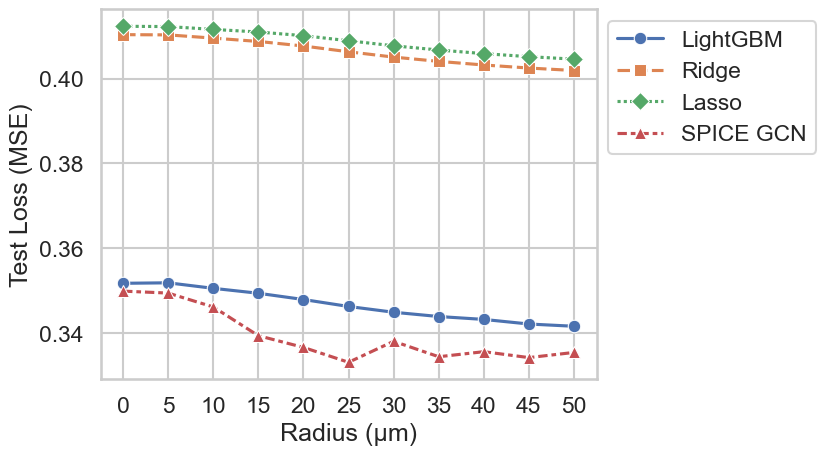

In [3]:
# Create DataFrames for results without and with cell types
lightgbm_results_wo_celltypes_df = pd.DataFrame(lightgbm_results_wo_celltypes.items(), columns=['Radius', 'w/o Celltypes Loss'])
lightgbm_results_with_celltypes_df = pd.DataFrame(lightgbm_results_with_celltypes.items(), columns=['Radius', 'w/ Celltypes Loss'])
deepST_results_wo_celltypes_df = pd.DataFrame(deepST_results_wo_celltypes.items(), columns=['Radius', 'w/o Celltypes Loss'])
deepST_results_with_celltypes_df = pd.DataFrame(deepST_results_w_celltypes.items(), columns=['Radius', 'w/ Celltypes Loss'])

# Combine DataFrames for plotting
no_celltypes_df = pd.concat((lightgbm_results_wo_celltypes_df, deepST_results_wo_celltypes_df), axis=0)
celltypes_df = pd.concat((lightgbm_results_with_celltypes_df, deepST_results_with_celltypes_df), axis=0)

# Function to check if a value is an integer
def is_int(n):
    try:
        int(n)  # Try to convert to int
        return True
    except ValueError:
        return False  # Return False if conversion fails

# Manually process no_celltypes_df
no_celltypes_df["Method"] = no_celltypes_df["Radius"].apply(lambda x: x.split(' ')[0] if not is_int(x.split(' ')[0]) else "SPICE GCN")
no_celltypes_df["Radius"] = no_celltypes_df["Radius"].apply(lambda x: x.split(' ')[-1])
no_celltypes_df = no_celltypes_df[no_celltypes_df['Radius'].astype(int) <= 50]

# Manually process celltypes_df
celltypes_df["Method"] = celltypes_df["Radius"].apply(lambda x: x.split(' ')[0] if not is_int(x.split(' ')[0]) else "SPICE GCN")
celltypes_df["Radius"] = celltypes_df["Radius"].apply(lambda x: x.split(' ')[-1])
celltypes_df = celltypes_df[celltypes_df['Radius'].astype(int) <= 50]

# Filter out 'OLS' method
no_celltypes_df = no_celltypes_df[no_celltypes_df["Method"] != "OLS"]

# Set the plot style
sns.set_theme("talk")
sns.set_style("whitegrid")

# Create the line plot
sns.lineplot(data=no_celltypes_df, x=r"Radius", y="w/o Celltypes Loss", marker='o', hue="Method", style="Method", markers=["o", "s", "D", "^", "v"])
# Customize x and y axis labels
plt.xlabel("Radius (μm)")
plt.ylabel("Test Loss (MSE)")


# Adjust legend and save the figure
plt.legend(bbox_to_anchor=(1, 1))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('real_data_wo_celltypes.png', bbox_inches="tight")

/tmp/ipykernel_961114/1017883222.py:13: UserWarning: The markers list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(


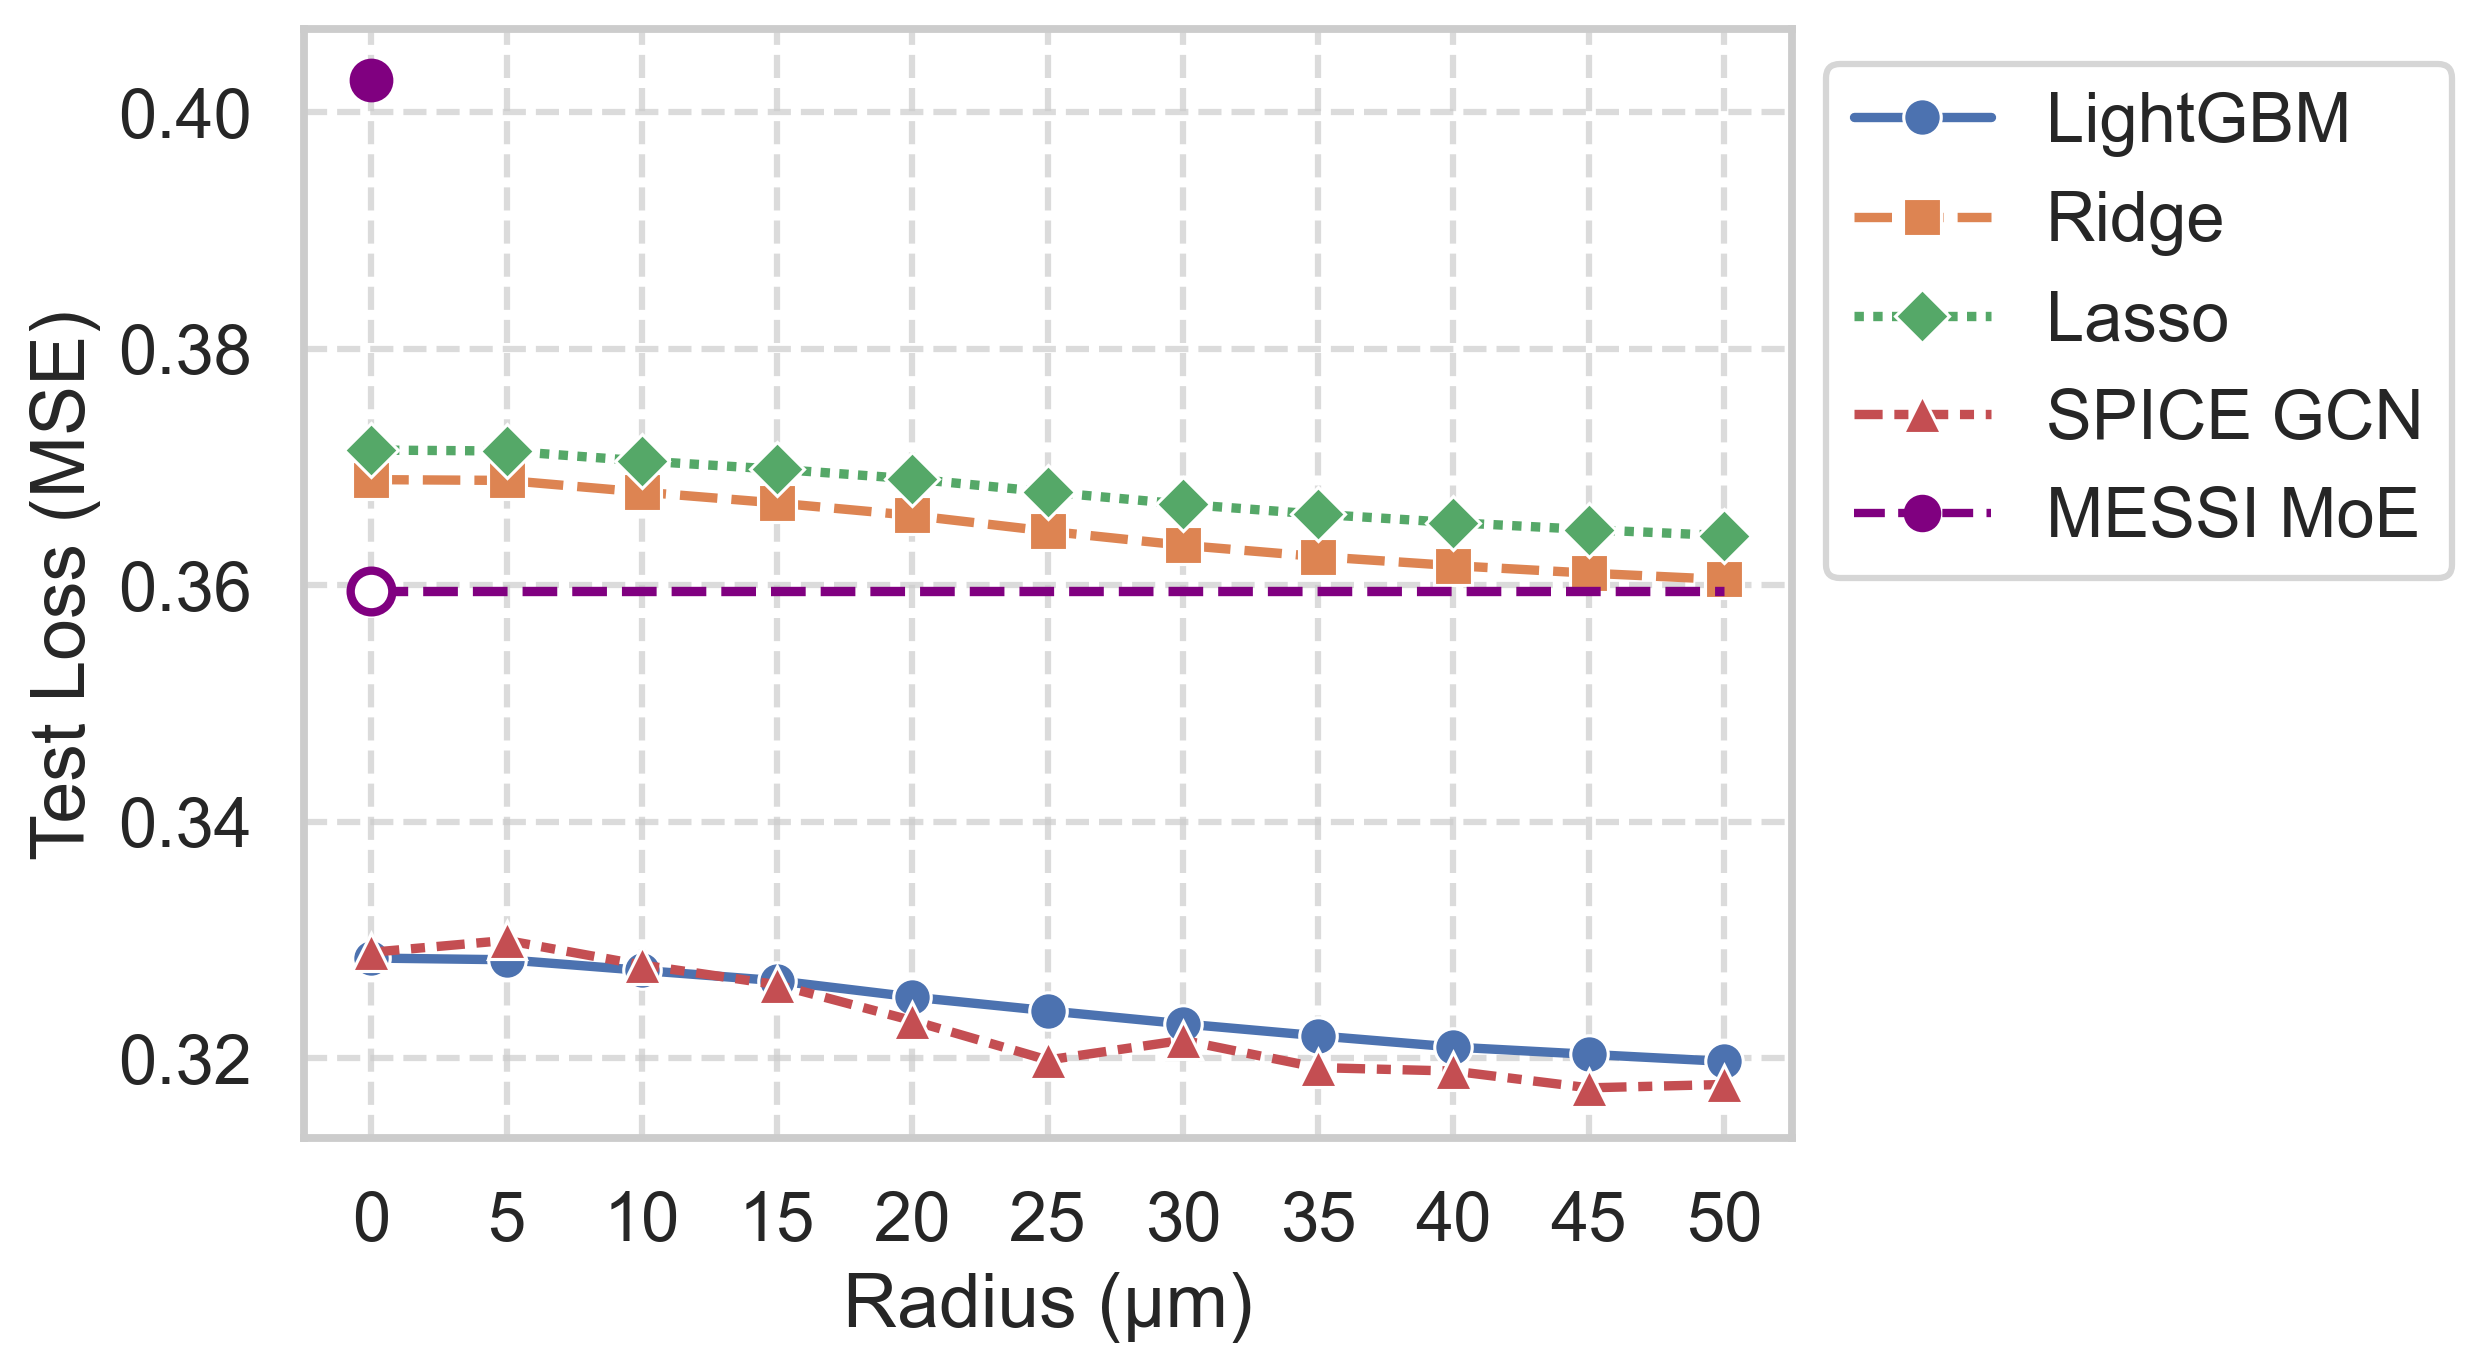

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Filter out OLS
celltypes_df = celltypes_df[celltypes_df["Method"] != "OLS"]

# Set theme and style
sns.set_theme("talk")
sns.set_style("whitegrid")

# Plot main methods
sns.lineplot(
    data=celltypes_df,
    x="Radius", y="w/ Celltypes Loss",
    marker='o', hue="Method", style="Method",
    markers=["o", "s", "D", "^", "v"]
)

# Labels and grid
plt.xlabel("Radius (μm)")
plt.ylabel("Test Loss (MSE)")
plt.grid(True, linestyle='--', alpha=0.7)

# Plot CLOSED dot at r = 0
plt.scatter(0, 0.4027415378514312, color='purple', zorder=5)

# Plot OPEN dot at r = 0 for line
plt.scatter(0, 0.3595, facecolors='white', edgecolors='purple', s=100, linewidths=2, zorder=4)

# Horizontal dashed line for r > 0
plt.hlines(y=0.3595, xmin=0.01, xmax=celltypes_df["Radius"].max(), color='purple', linestyle='--', zorder=3)

# --- Custom Legend Handle for MESSI ---
messi_handle = Line2D(
    [0], [0],
    color='purple', linestyle='--', linewidth=2,
    marker='o', markerfacecolor='purple', markeredgecolor='purple',
    markersize=8, label='MESSI MoE'
)

# Combine with other legend items
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(messi_handle)
labels.append("MESSI MoE")

plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1, 1))

# Save high-res
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('real_data_WITH_celltypes.png', bbox_inches="tight")


# Figure 6

In [12]:
response_indexes = [0,2,3,4,5,6,7,10,19,20,21,22,23,24,25,26,27,28,32,34,35,37,38,39,40,41,42,43,44,52,53,54,55,58,63,64,66,67,69,71,73,74,75,76,77,78,79,80,85,86,87,88,93,94,96,97,99,102,103,104,106,110,112,113,114,116,118,119,120,121,122,123,124,125,126,129,130,131,133,134,141,142,147,151]

In [13]:
data = pd.read_csv("../data/raw/merfish.csv")
data = data.drop(["Fos", "Blank_1", "Blank_2", "Blank_3", "Blank_4", "Blank_5"], axis=1)
data = data.iloc[:, 9:]

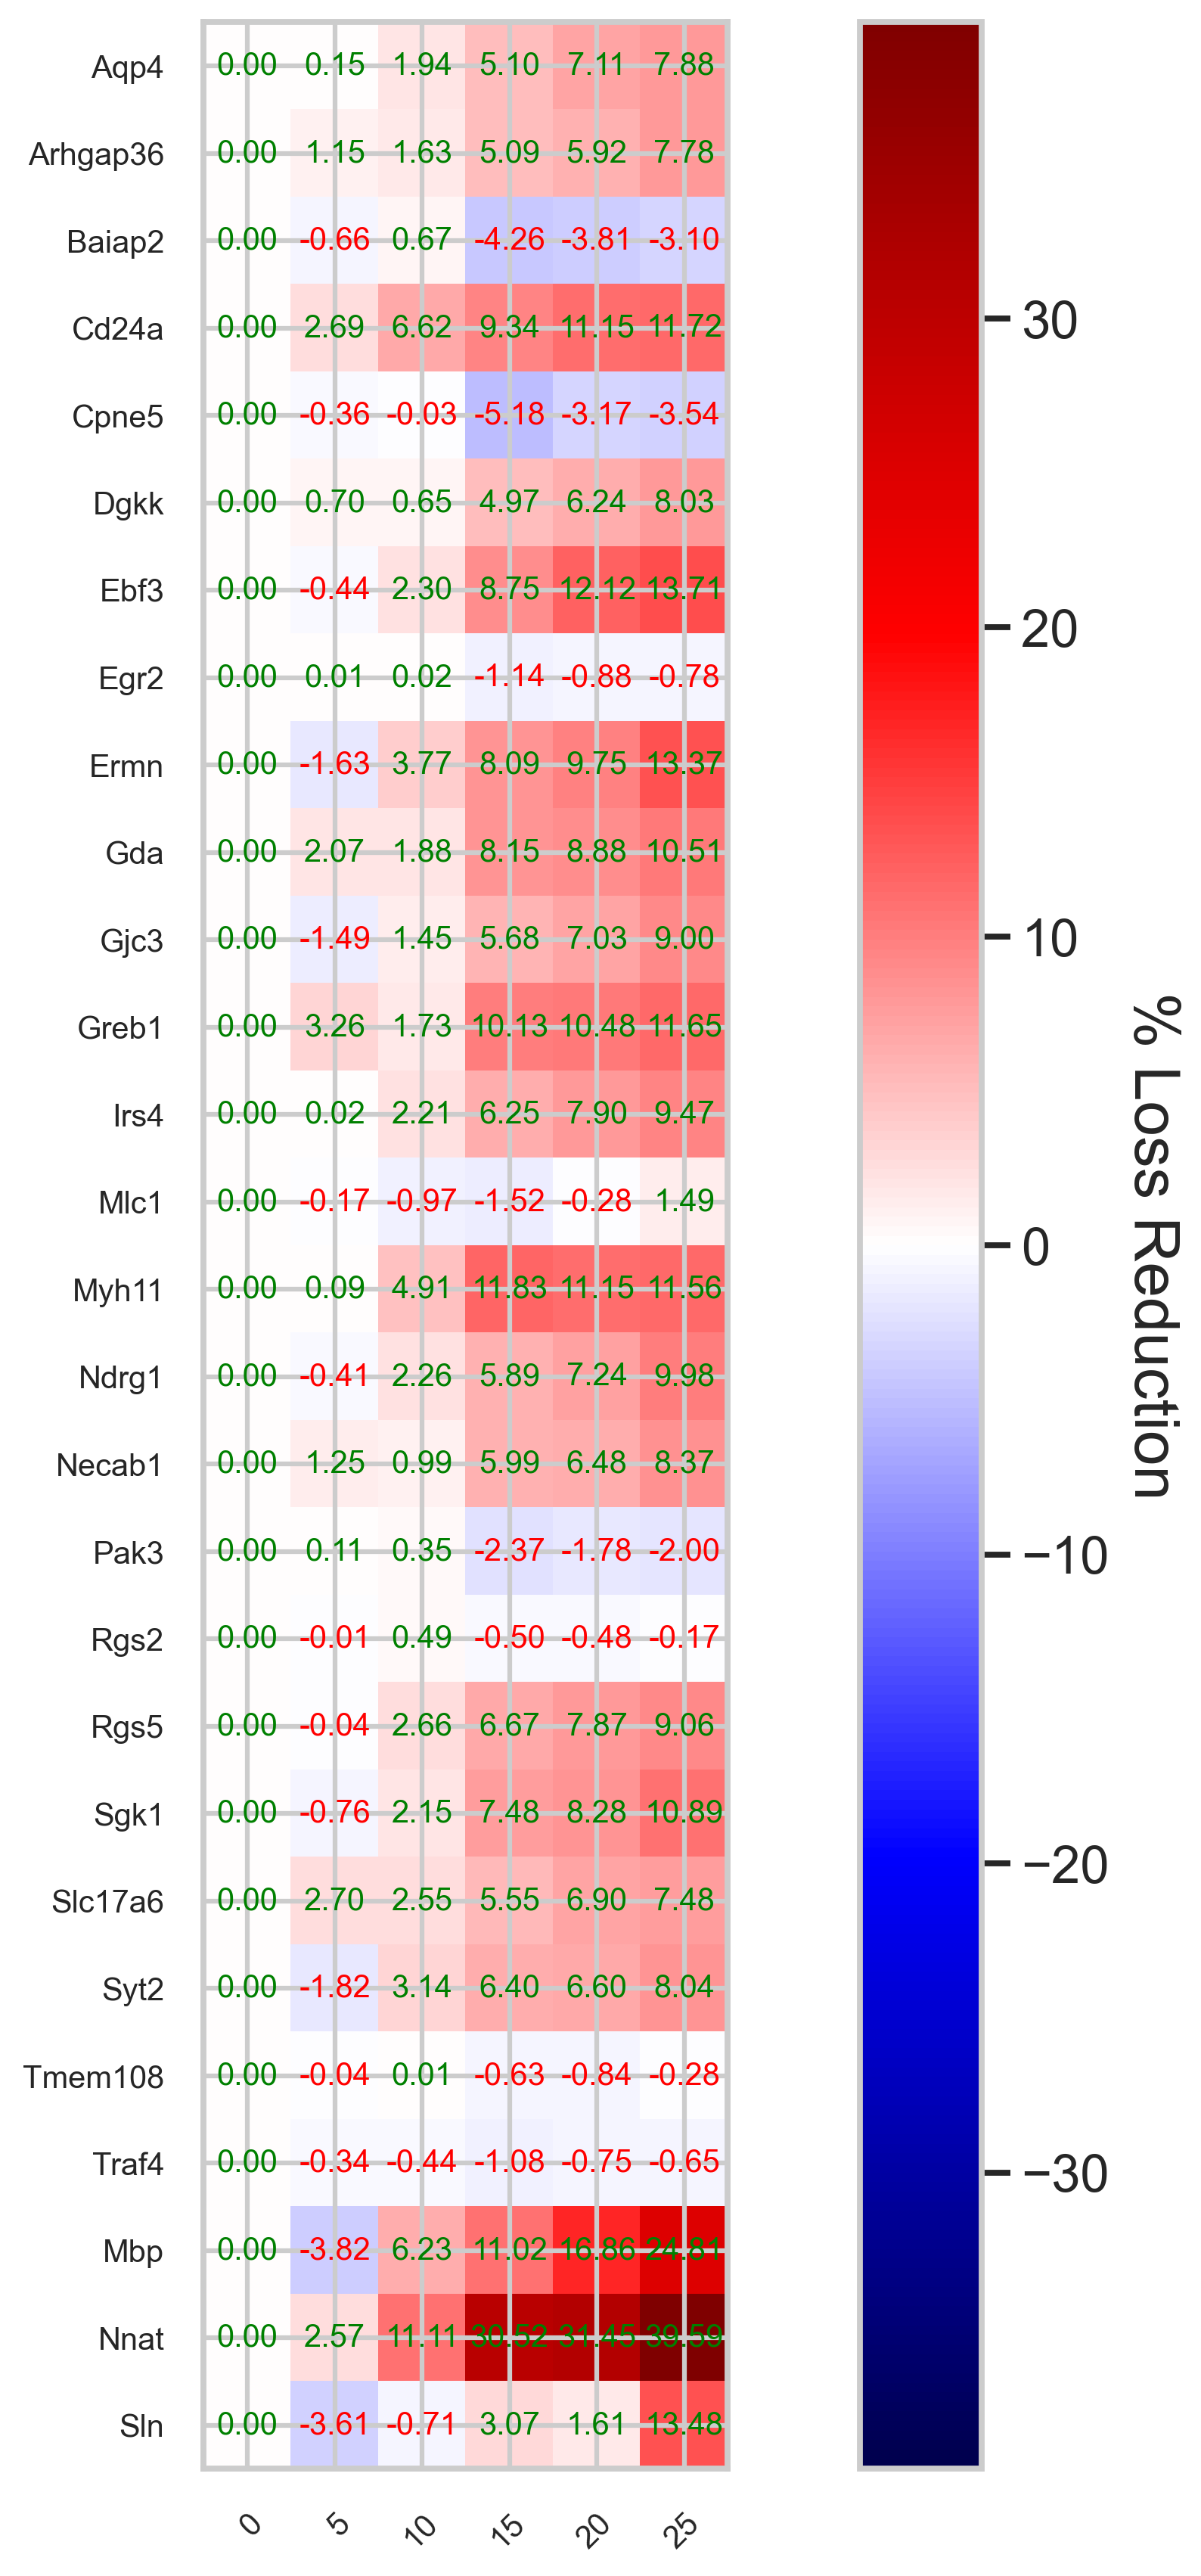

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open("0v60.json", "r") as file:
    loss_dict = json.load(file)

radius_values = list(range(0, 26, 5))
genes = [data.columns[i] for i in response_indexes]

loss_array = np.array([
    [-loss_dict[str(rad)][gene]["percent_diff"] if rad != 0 else 0 for rad in radius_values] for gene in genes
])

# regenerate the loss array with gene filter
THRESHOLD_ABS = 20
THRESHOLD_MIN = 0
genes = [genes[i] for i in range(len(genes)) if ( (sum([np.abs(x) for x in loss_array[i]]) > THRESHOLD_ABS) or sum(loss_array[i]) < THRESHOLD_MIN )]
loss_array = np.array([
    [-loss_dict[str(rad)][gene]["percent_diff"] if rad != 0 else 0 for rad in radius_values] for gene in genes
])

# Set the figure size based on the dimensions of your data
cell_width = 2.5
cell_height = 0.5
fig, ax = plt.subplots(figsize=(cell_width*len(radius_values), cell_height*len(genes)))

im = ax.imshow(loss_array, cmap='seismic', vmin=-np.max(np.abs(loss_array)), vmax=np.max(np.abs(loss_array)))

# Add a colorbar for reference with adjusted fraction to make it thinner
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.05)
cbar.ax.set_ylabel("% Loss Reduction", fontsize=20, rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(radius_values)))
ax.set_xticklabels(list(radius_values))
ax.set_yticks(np.arange(len(genes)))
ax.set_yticklabels(genes)

# Adjust font size
ax.tick_params(axis='both', which='major', labelsize=10)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Dynamically adjust text color based on cell value and format the number to 2 decimal places
for i in range(len(genes)):
    for j in range(len(radius_values)):
        if loss_array[i, j] < 0:  # If value is negative, use white text
            text_color = 'red'
        else:  # Otherwise, use black text
            text_color = 'green'
        text = ax.text(j, i, f"{loss_array[i, j]:.2f}",
                       ha="center", va="center", color=text_color, fontsize=10)

# ax.set_title("Predictions Across $r$ Values", fontsize=25)
# fig.tight_layout()
plt.savefig("spatial_vertical.png", dpi=600)
plt.show()

# Figure 7

In [15]:
with open("0v60.json", "r") as f:
    loss_dict = json.load(f)

In [16]:
percent_differences = [-loss_dict["25"][x]["percent_diff"] for x in loss_dict["25"]]

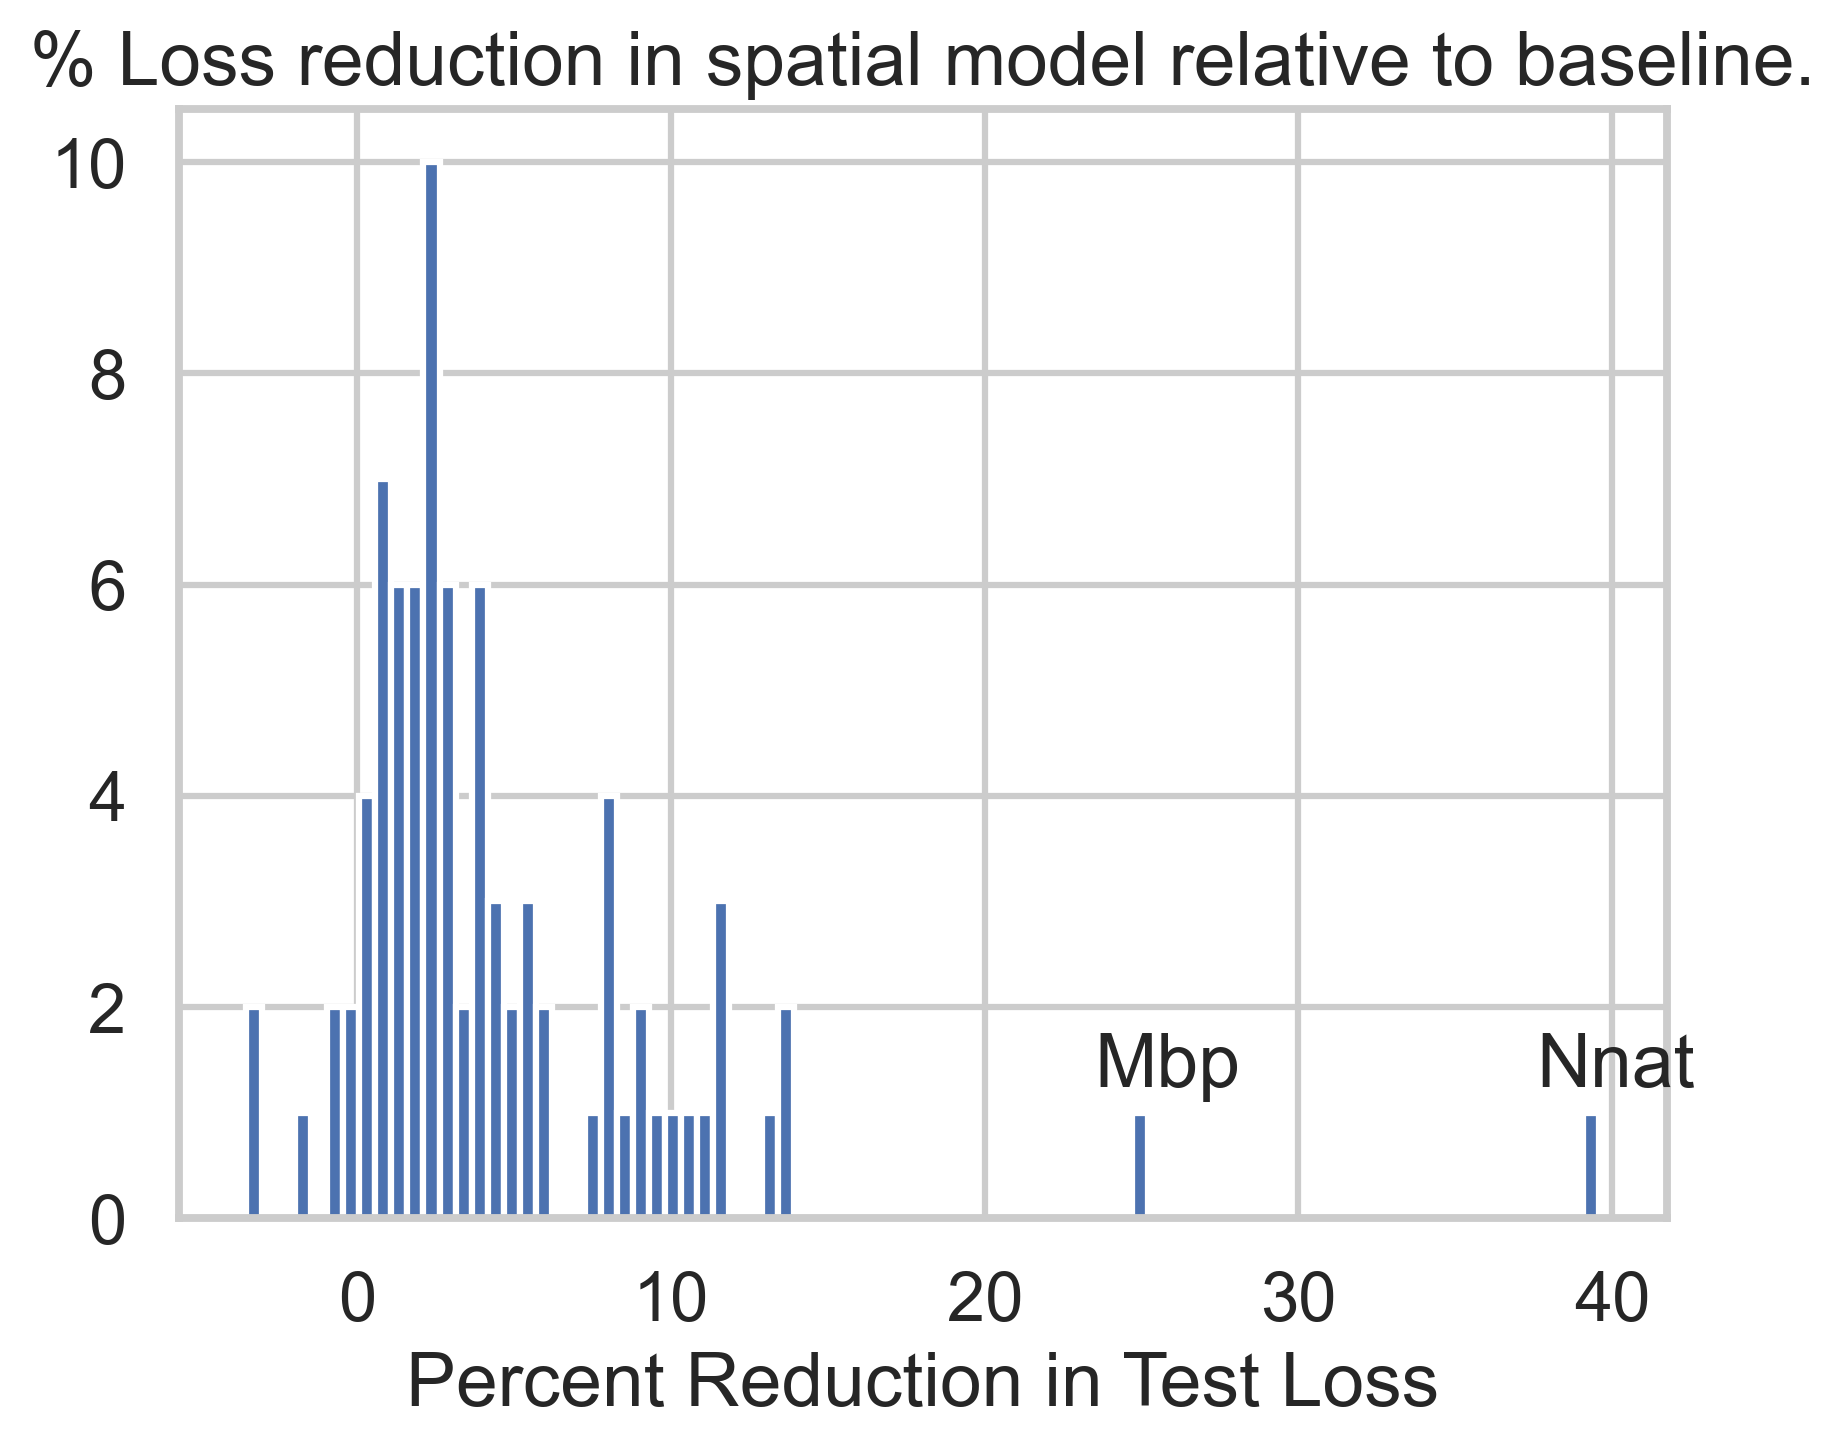

In [17]:
plt.hist(percent_differences, bins=len(loss_dict["25"]))
plt.title("% Loss reduction in spatial model relative to baseline.")
plt.xlabel("Percent Reduction in Test Loss")
plt.annotate("Nnat", xy=(39.5866-2, 1.25))
plt.annotate("Mbp", xy=(24.8099-1.3, 1.25))
plt.savefig("0VSspatial.png", dpi=300)
plt.show()

# Figure 8

In [18]:
with open('deepST_synthetic_results.json', 'r') as deepST:
    test_loss_rad_dict = json.load(deepST)

In [19]:
with open('LightGBM_synthetic_results.json', 'r') as linear:
    linear_models_dict = json.load(linear)

# Figure 9

In [20]:
# create dataframe
import pandas as pd

# linear models + XGBoost
data = pd.DataFrame(columns=['Model', 'Radius', 'Experiment #', 'L2 Loss'])
for k,v in linear_models_dict.items():
    k = k.split()
    entry = pd.DataFrame.from_dict({
        'Model': [k[0]],
        'Radius': [int(k[1])],
        'Experiment #': [k[2]],
        'L2 Loss': [v]
    })
    data = pd.concat([data, entry], ignore_index=True)

print(data)


for k,v in test_loss_rad_dict.items():
    try:
        k = eval(k)
        entry = pd.DataFrame.from_dict({
            'Model': 'deepST',
            'Radius': [int(k[0])],
            'Experiment #': [str(k[1])],
            'L2 Loss': [min(v.values())]
        })
        data = pd.concat([data, entry], ignore_index=True)
    #nonlinear case
    except (AttributeError, ValueError):
        entry = pd.DataFrame.from_dict({
            'Model': 'deepST',
            'Radius': [int(k[0])],
            'Experiment #': [str(k[1])],
            'L2 Loss': [v]
        })
        data = pd.concat([data, entry], ignore_index=True)
        

data[data["Model"] == "SPICE GCN"]

          Model Radius Experiment #   L2 Loss
0      LightGBM      0            0  0.229992
1           OLS      0            0  0.230439
2         Ridge      0            0  0.230426
3         Lasso      0            0  0.231350
4    ElasticNet      0            0  0.230434
..          ...    ...          ...       ...
817       Lasso     55          FDR  0.203158
818    LightGBM     60          FDR  0.001986
819         OLS     60          FDR  0.202371
820       Ridge     60          FDR  0.202371
821       Lasso     60          FDR  0.203158

[822 rows x 4 columns]


,Model,Radius,Experiment #,L2 Loss
822,deepST,25,0,0.068342
823,deepST,0,0,0.235169
824,deepST,0,1,0.065368
825,deepST,0,4,0.000471
826,deepST,0,5,0.000914
...,...,...,...,...
934,deepST,40,2,0.313488
935,deepST,45,2,0.311361
936,deepST,50,2,0.313585
937,deepST,55,2,0.307252


/tmp/ipykernel_2608693/849942767.py:21: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.pointplot(x='Radius', y='L2 Loss', hue='Model', data=highlight_data, markers=["D"], linestyles=["--"], color="red", dodge=0.2)  # Use different markers and linestyles for emphasis if you like


ZeroDivisionError: float division by zero

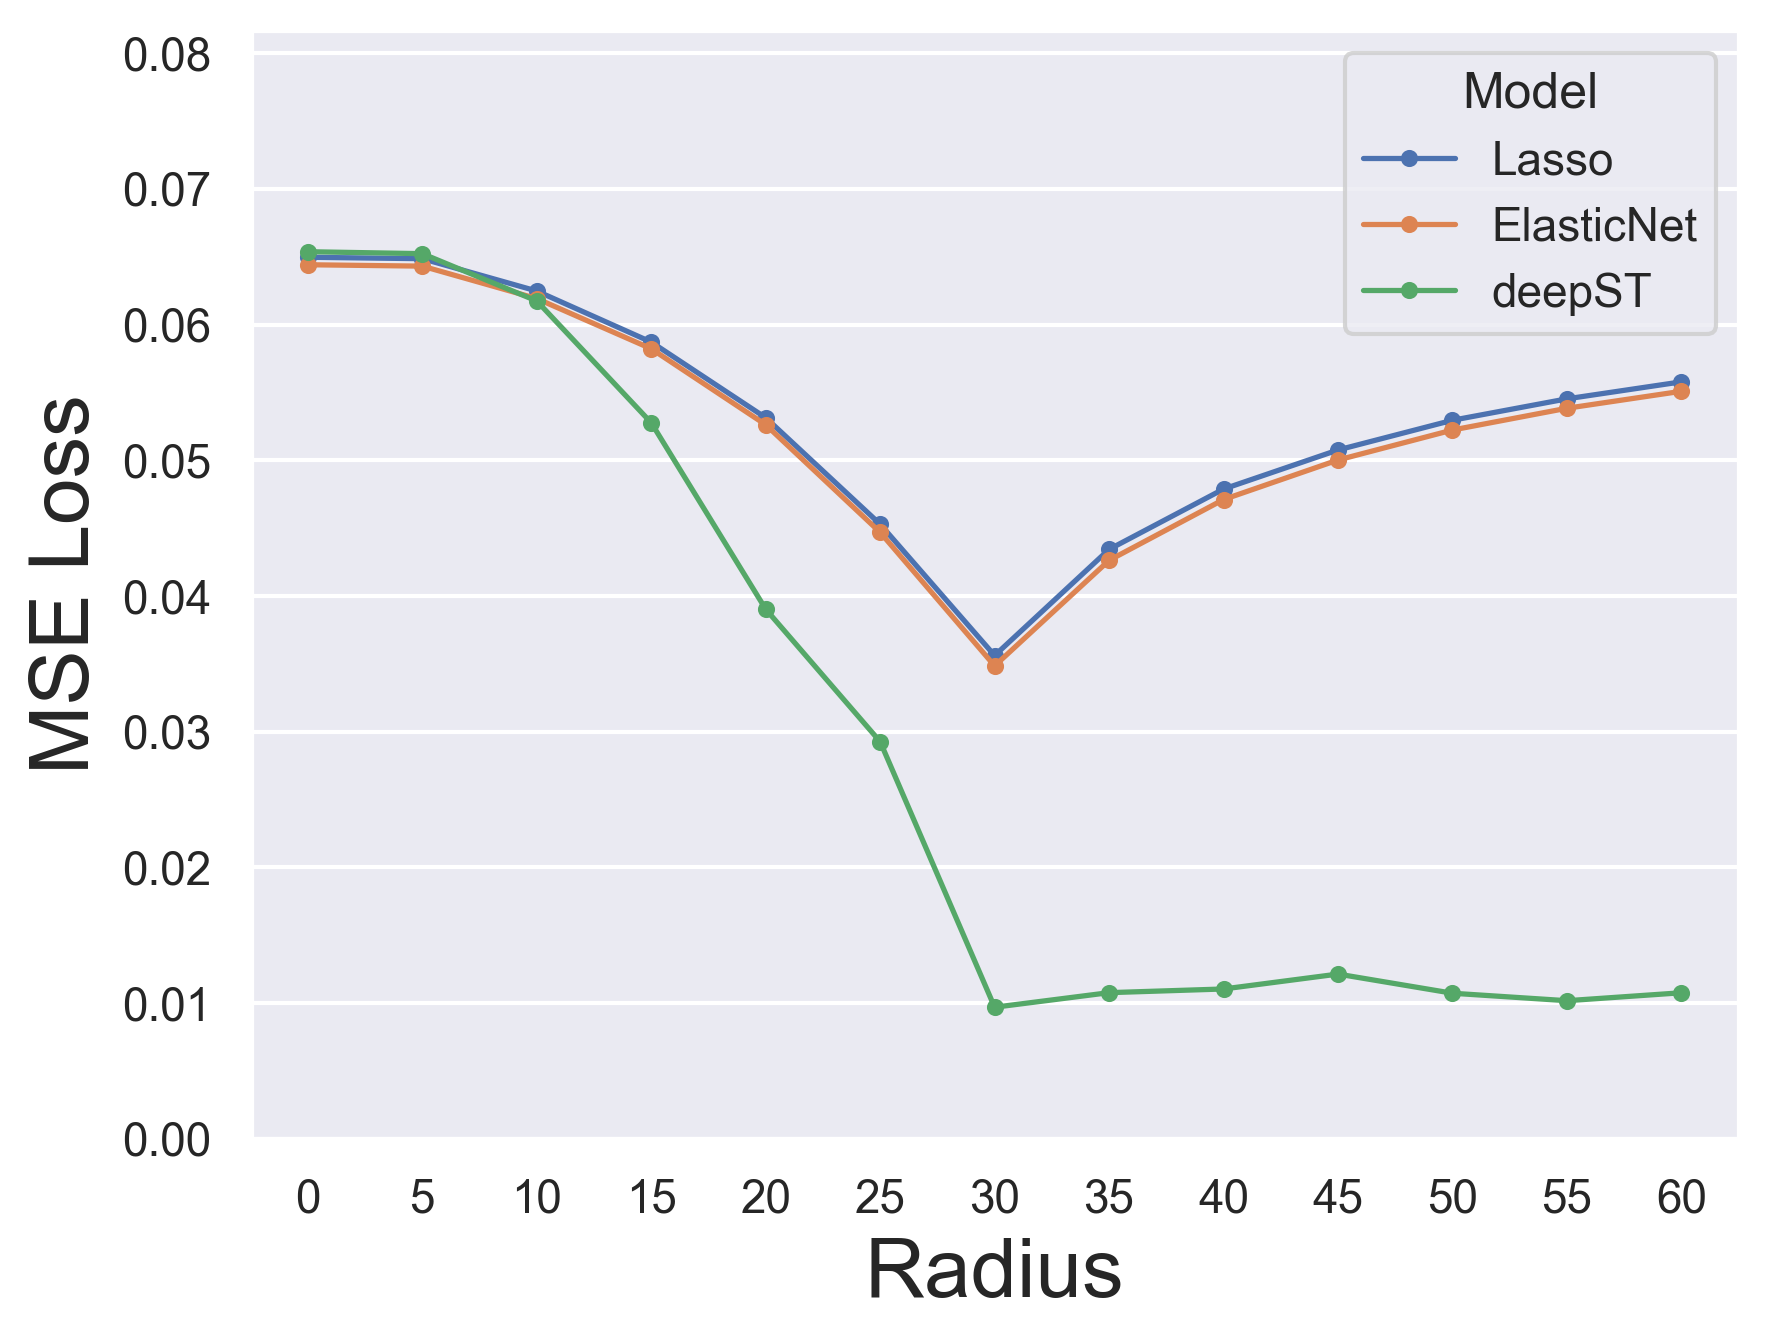

In [21]:
EXPERIMENT_NUM = "1"

# Set styles before plotting
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set(rc={"lines.linewidth": 0.7})

# Create pointplot for all but the specific model
model_to_highlight = "LightGBM"
new_data = data[(data['Experiment #'] == EXPERIMENT_NUM) & ((data["Model"] != "OLS") & (data["Model"] != "Ridge") & (data['Model'] != model_to_highlight))]
synth_results = sns.pointplot(x='Radius', y='L2 Loss', hue='Model', data=new_data)

# Set the y-limits
synth_results.set_ylim(bottom=0, top=1.25*max(new_data["L2 Loss"]))

# Label and title configurations
synth_results.set_xlabel("Radius", fontsize=20)
synth_results.set_ylabel("MSE Loss", fontsize=20)

# Create pointplot just for the specific model to highlight
highlight_data = data[(data['Model'] == model_to_highlight) & (data['Experiment #'] == EXPERIMENT_NUM)]
sns.pointplot(x='Radius', y='L2 Loss', hue='Model', data=highlight_data, markers=["D"], linestyles=["--"], color="red", dodge=0.2)  # Use different markers and linestyles for emphasis if you like

# Save the plot
plt.savefig(f'synthetic{EXPERIMENT_NUM}.png', dpi=300, bbox_inches='tight')

In [7]:
EXPERIMENT_NUM = "Nonlinear"

# Set styles before plotting
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set(rc={"lines.linewidth": 0.7})

# Create pointplot for all but the specific model
model_to_highlight = "LightGBM"
new_data = data[(data['Experiment #'] == EXPERIMENT_NUM) & ((data["Model"] != "OLS") & (data["Model"] != "Ridge") & (data['Model'] != model_to_highlight))]
synth_results = sns.pointplot(x='Radius', y='L2 Loss', hue='Model', data=new_data)

# Set the y-limits
synth_results.set_ylim(bottom=0, top=1.25*max(new_data["L2 Loss"]))

# Label and title configurations
synth_results.set_xlabel("Radius (μm)", fontsize=20)
synth_results.set_ylabel("MSE Loss", fontsize=20)

# Create pointplot just for the specific model to highlight
highlight_data = data[(data['Model'] == model_to_highlight) & (data['Experiment #'] == EXPERIMENT_NUM)]
sns.pointplot(x='Radius', y='L2 Loss', hue='Model', data=highlight_data, markers=["D"], linestyles=["--"], color="red", dodge=0.2)  # Use different markers and linestyles for emphasis if you like

# Save the plot
plt.savefig(f'synthetic{EXPERIMENT_NUM}.png', dpi=300, bbox_inches='tight')

TypeError: '_io.TextIOWrapper' object is not subscriptable